1. Introduction

Black Friday is one of the most significant sales events of the year for both companies and customers. This creates an opportunity for firms to increase their sales revenue and clear out inventory for the upcoming year's products, while customers benefit from good deals. However, the strategies used to determine discount amounts can vary depending on the company's goals, such as attracting new customers, clearing outdated stock, or increasing market share. Understanding the factors influencing these discounts is essential for optimizing pricing strategies and maximizing profits. This report explores the relationship between customer review scores and Black Friday discounts, based on the data collected from Wayfair, which is a leading e-commerce company in the USA. This analysis aims to understand whether customer review scores affects discount on Black Friday.

2. Do customer review scores affect percentage discounts during the Black Friday sale?

Based on "Figure 1: Correlation of Discount Percentage and Review Types", the heatmap reveals the correlation between discount percentage on Black Friday and customer review types, from five-star to one-star. We can see that the correlation slightly increases as the star increases. For example, one-star has 0.04 two-star has 0.07 and three-star has 0.09 correlation, and so on. Five-star reviews have the highest correlation (0.16) with discount percentages, suggesting that products with higher star ratings tend to receive slightly higher discounts. Unfortunately, this correlation is very weak, meaning that review scores are not a strong driver for determining discount percentages on Black Friday, at least for the Wayfair case. Therefore, there maybe other factors that affect to the Black Friday Discount such as product type, the number of product they have in storage or trend.

3. Top 3 insights.

A. Discount strategy (Describe)

Based on the descriptive analysis of the data, the Black Friday deals offer a good discount. From the table, we can see that the average original price of a product is 351.34 dollar, but after discounts, this drops to 231.09 dollar. This illustrates that the company is offering a fair discount. Also, the product prices range from 5 to 4,550 dollar, this shows that the company has a wide range of products on sale to target different income customers. After discounts, products at the 25th percentile are priced around $44, while those at the 75th percentile reach 245 dollar meaning that this deal probably targets mostly both low and average-income households.

B. Product reviews reliability (Correlation)

Based on "Figure 1: Correlation of Discount Percentage and Review Types", five-star ratings are highly correlated with four-star ratings with 0.96, and the correlation gradually decreases as review ratings decrease. For instance, the correlation drops to 0.84 with three-star, and 0.74 with two-star reviews. This shows that overall customer satisfaction with products is consistent and closely aligned. Such a smooth trend/pattern of correlation across different reviews indicates that the reviews on Wayfair are authentic and not manipulated by fake reviews. In other words, if the company was buying fake reviews, there would be no such pattern, but just inconsistent ratings. 

C. Discounted product types (value counts)

The data reveal that products belonging to the Bathroom, Lighting, and Outdoor & Patio categories are mostly discounted during the Black Friday sale. Looking deeper, most of the products from the subcategories such as Decor, Furniture, and Accessories have received discounts. For products with a discount percentage above 30%, fall to Decor (18 products), Furniture (14 products), and Accessories (12 products). This product category based discounting  strategy can be result from various factors. For example, Decor and Furniture might be because of holidays when customers prepare for guests and Christmas. On the other hand, higher discounts on these type of products could be because of efforts to clear inventory because these types of products often have big sizes. Additionally, discounting popular product types like Decor and Furniture could appeal to price-sensitive customers looking to enhance their homes at a lower cost. Unfortunately, due to data limitation problem such as not having the number of sales or trend data, we cannot be sure whether these discounts are driven primarily by product demand, seasonality, or inventory management strategies.

4. Written analysis of the analytical techniques above.

Throughout the analysis, multiple analytical techniques were used to understand the effect of customer reviews on Black Friday discount, including both correlation analysis to answer to the business question and exploratory data analysis for uncovering further insights. 

Correlation analysis provided understanding on how reviews and Black Friday deal affects to the discount amount. A low correlation 0.16 between the five-star and discount percentage illustrated there is very minimal relationship between the two variables. However, the slight increase in correlation each time star reviews increases indicates that there is very slight impact. On the other hand, the correlation outcome between customer reviews such as five_star and four_star at 0.96, shows the consistency in customer review patterns which demonstrates that Wayfair's customer review is not manipulated to affect customer purchasing decision, but authentic.

In terms of the exploratory data analysis, multiple approaches such as descriptive statistics, value count based on product category and discount percentage added additional insights. We were able to determine through descriptive analysis that Wayfair's Black Friday sales emphasize a variety of product categories with notable price reductions. The large price range demonstrates efforts to appeal to both luxury and budget-conscious clients. Furthermore, while pricing outliers indicate the need for focused tactics for more expensive products, patterns in customer evaluations support trends in product satisfaction. These results lay the groundwork for additional correlation research to determine the connections between customer evaluations and discounts.  Value counts for categorical variables like category and subcategory showed that Bathroom, Lighting, and Outdoor & Patio were the most discounted categories, while Decor, Furniture, and Accessories led among subcategories.

5. Conclusion

The analysis of Wayfair’s product dataset reveals key trends and patterns surrounding Black Friday discounts. The weak correlation between customer reviews and discounts (highest at 0.16 for five-star reviews) suggests that there are other factors influencing to Wayfair's Black Friday Deals, such as inventory management and seasonal demand. Categories such as Bathroom, Lighting, and Outdoor & Patio, along with subcategories like Decor, Furniture, and Accessories, emerge as the most discounted categories, which may be because of seasonal popularity and potential inventory clearance goals. To optimize its Black Friday strategy, Wayfair can prioritize inventory clearance for oversized items, align discounts with holiday-related demand, and introduce dynamic pricing for popular categories. On the other hand, reviews may have minimal influence on discounts, but their authenticity and consistency can be leveraged in marketing campaigns to build trust and encourage conversions. However, further analysis, including the number of sales data, is needed to fully determine the trends and their implications.

Also, targeted promotions based on customer demographics, such as budget-friendly deals for decor and premium discounts for high-end furniture, can cater to diverse customer needs. Bundling related products can increase purchase value, while advanced analytics, including A/B testing and predictive modeling, can refine discount strategies and optimize inventory planning.

Partnerships with top-performing brands, such as Red Barrel Studio and Wade Logan, can amplify the impact of Black Friday campaigns through exclusive deals and enhanced brand visibility. Addressing null reviews with detailed product information and incentives for initial feedback will also bolster customer trust and improve decision-making for future campaigns. By implementing these recommendations, Wayfair can maximize the effectiveness of its Black Friday discounts, improve operational efficiency, and foster sustained growth.

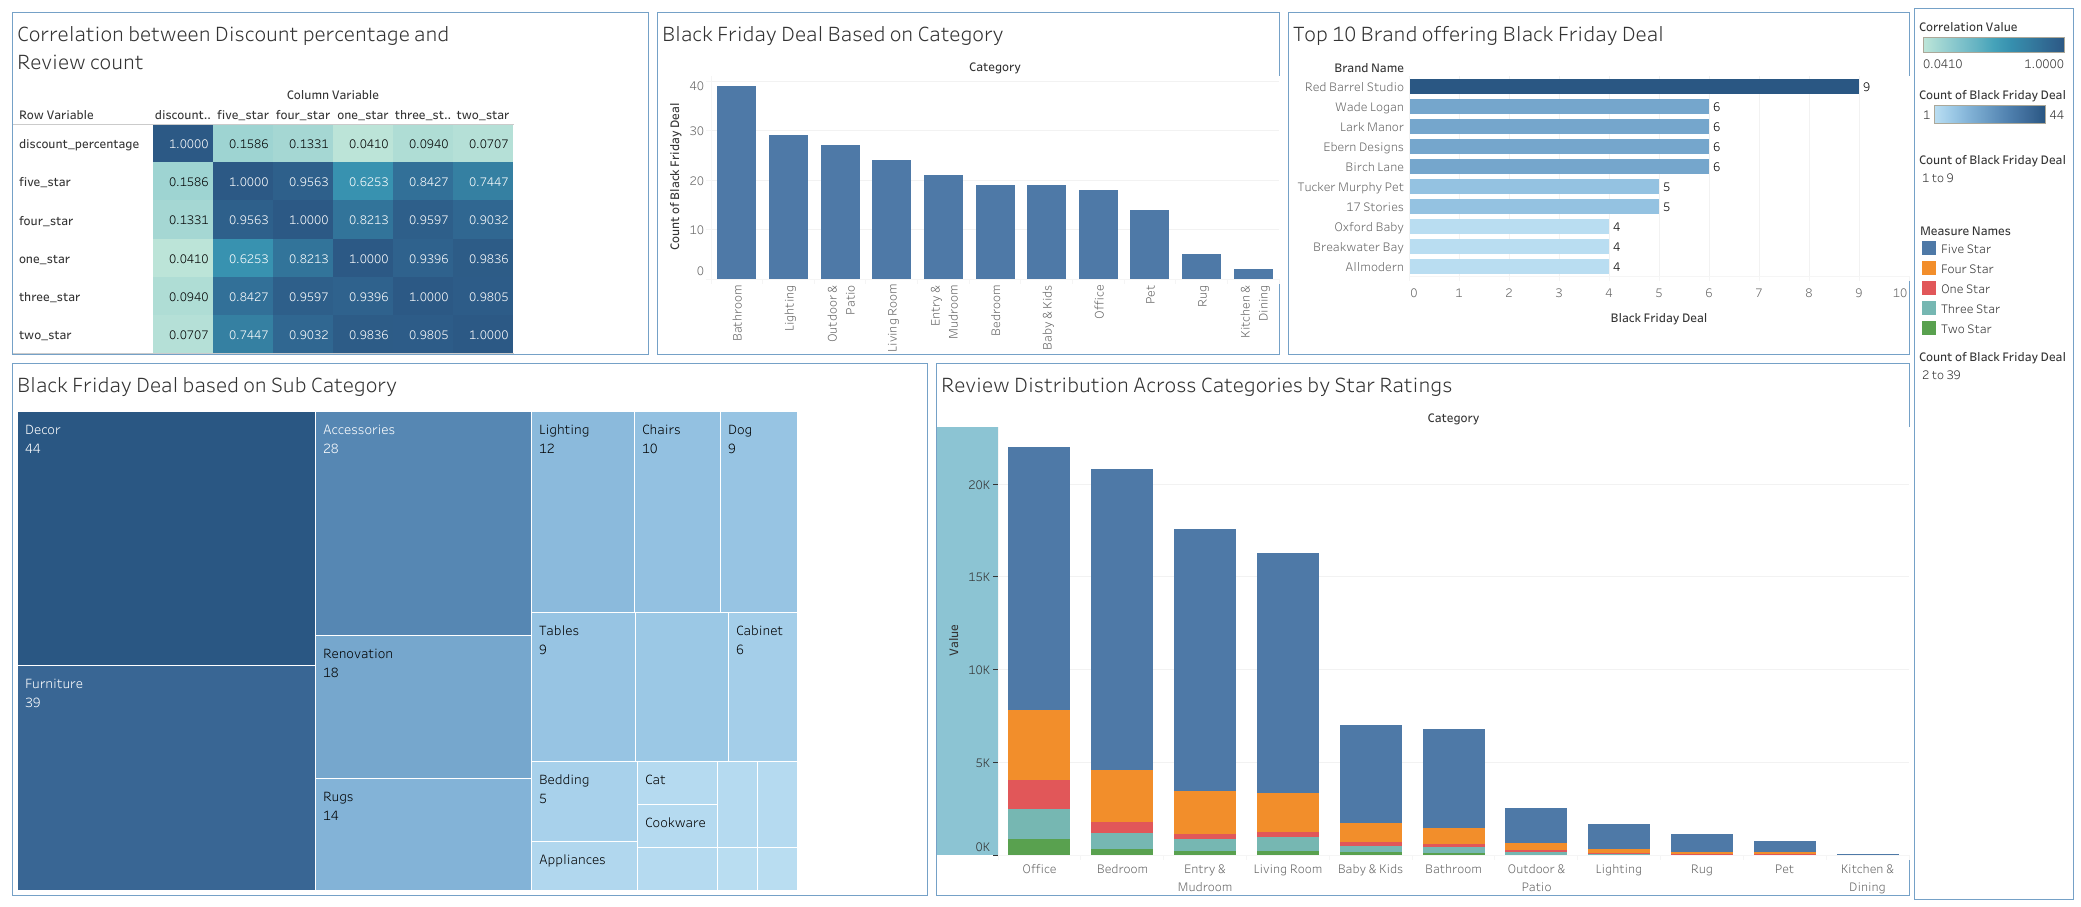

In [55]:
#Importing necessary tools to extract data set from mySQL.
import mysql.connector
import pandas as pd

In [2]:
try:
    # Connect to MySQL
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="",
        database="h_furniture",
        charset="utf8"
    )
    
    if conn.is_connected():
        print("Connected to the database") #Successful connection
        
        # SQL query to fetch data
        query = """
        SELECT 
            p.product_id, 
            p.product_name,
            c.category,
            s.subcategory,
            b.brand_name,
            col.listed_color,
            pr.original_price,
            pr.discounted_price,
            pr.black_friday_deal,
            r.five_star,
            r.four_star,
            r.three_star,
            r.two_star,
            r.one_star
        FROM 
            product AS p
        LEFT JOIN 
            catsub AS cs ON cs.product_id = p.product_id
        LEFT JOIN 
            subcategory AS s ON cs.subcategory_id = s.subcategory_id
        LEFT JOIN 
            procat AS pc ON pc.product_id = p.product_id
        LEFT JOIN 
            category AS c ON pc.category_id = c.category_id
        LEFT JOIN 
            brand AS b ON p.brand_id = b.brand_id
        LEFT JOIN 
            color AS col ON p.color_id = col.color_id
        LEFT JOIN 
            price AS pr ON p.price_id = pr.price_id
        LEFT JOIN 
            review AS r ON p.review_id = r.review_id
        WHERE 		
            black_friday_deal=1 ;
        """
        
        # Load the data into a DataFrame
        df = pd.read_sql_query(query, conn)
        
        # Clean up leading and trailing whitespace
        df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
        
        # Save the DataFrame to an Excel file
        output_csv_path = './H_furniture_sql_result.csv'
        df.to_csv(output_csv_path, index=False)
        
        print(f"Data has been successfully saved to {output_csv_path}")
    
except mysql.connector.Error as err:
    print(f"Database error: {err}")
    
except Exception as e:
    print(f"An error occurred: {e}")
    
finally:
    # Close the connection
    if 'conn' in locals() and conn.is_connected():
        conn.close()
        print("Connection closed.")

Connected to the database
Data has been successfully saved to ./H_furniture_sql_result.csv
Connection closed.


C:\Users\Dell\AppData\Local\Temp\ipykernel_35724\2956947335.py:57: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
C:\Users\Dell\AppData\Local\Temp\ipykernel_35724\2956947335.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [3]:
#Loading H_furniture_sql_result in jupyter notebook
file = "./H_furniture_sql_result.csv"
data_set = pd.read_csv(file)
print(data_set.head(10)) #Printing first 10 row of the data.

   product_id                                       product_name  \
0           2                           Allura 67 Kitchen Pantry   
1           3   Theory Glass Picture Frame - Set of 2 (Set of 2)   
2           4               Haute Chapeau  Haute Chapeau Rouge I   
3           6         Daniel Jean-baptiste plants and Flowers no   
4           7  LI55971LL Framed tempered glass shower door 56...   
5          14                               Blackout Roman Shade   
6          16  Radiant Half-Moon Metal Wall Decor Set (Set of 2)   
7          19  Custom Name Letter Monogram Family Personalize...   
8        1036      Oppelo Solid Wood Top Metal Base Dining Table   
9          31                American Retro Style Accent Cabinet   

          category   subcategory            brand_name listed_color  \
0           Office  Organization           Three Posts         Blue   
1          Bedroom         Decor             Eichholtz        White   
2      Living Room         Decor      

In [4]:
# Display information about the DataFrame
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         217 non-null    int64  
 1   product_name       217 non-null    object 
 2   category           217 non-null    object 
 3   subcategory        217 non-null    object 
 4   brand_name         217 non-null    object 
 5   listed_color       217 non-null    object 
 6   original_price     217 non-null    int64  
 7   discounted_price   217 non-null    int64  
 8   black_friday_deal  217 non-null    int64  
 9   five_star          155 non-null    float64
 10  four_star          155 non-null    float64
 11  three_star         155 non-null    float64
 12  two_star           155 non-null    float64
 13  one_star           155 non-null    float64
dtypes: float64(5), int64(4), object(5)
memory usage: 23.9+ KB


Exploratory data analysis

In [5]:
#describing the dataframe
data_set.describe()

,product_id,original_price,discounted_price,black_friday_deal,five_star,four_star,three_star,two_star,one_star
count,217.000000,217.000000,217.000000,217.0,155.000000,155.000000,155.000000,155.000000,155.000000
mean,575.631336,351.341014,231.092166,1.0,466.129032,87.819355,30.800000,15.283871,21.819355
std,308.324043,563.634760,416.320824,0.0,1769.725174,341.892830,128.485302,69.377731,117.539243
min,2.000000,5.000000,5.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.000000,60.000000,44.000000,1.0,6.000000,1.000000,0.000000,0.000000,0.000000
50%,617.000000,165.000000,108.000000,1.0,36.000000,5.000000,2.000000,1.000000,1.000000
75%,781.000000,405.000000,245.000000,1.0,174.500000,30.500000,13.000000,8.000000,8.000000
max,1283.000000,4550.000000,3698.000000,1.0,12948.000000,2414.000000,1227.000000,743.000000,1356.000000


In [6]:
#Counting discounted product types using value count
category_counts = data_set['category'].value_counts()
print(category_counts)        #Counting based on category

print("\n" + "-" * 30 + "\n") #To separate outcome from other value counts tables.

subcategory_counts = data_set['subcategory'].value_counts()
print(subcategory_counts)     #Counting based on subcategory

print("\n" + "-" * 30 + "\n") #To separate outcome from other value counts tables.


brand_name_counts = data_set['brand_name'].value_counts()
print(brand_name_counts)      #Counting based on brand

print("\n" + "-" * 30 + "\n") #To separate outcome from other value counts tables.

color_counts = data_set['listed_color'].value_counts()
print(color_counts)           #Counting based on color

category
Bathroom            39
Lighting            29
Outdoor & Patio     27
Living Room         24
Entry & Mudroom     21
Bedroom             19
Baby & Kids         19
Office              18
Pet                 14
Rug                  5
Kitchen & Dining     2
Name: count, dtype: int64

------------------------------

subcategory
Decor           44
Furniture       39
Accessories     28
Renovation      18
Rugs            14
Lighting        12
Chairs          10
Dog              9
Tables           9
Organization     8
Cabinet          6
Bedding          5
Appliances       3
Plants           2
Greenhouses      2
Cat              2
Cookware         2
Reptile          2
Grilling         1
Chicken          1
Name: count, dtype: int64

------------------------------

brand_name
Red Barrel Studio     9
Lark Manor            6
Birch Lane            6
Ebern Designs         6
Wade Logan            6
                     ..
Msi                   1
Mentionedyou          1
Myhomekeepers         1
L

In [7]:
# Calculate discount percentage
data_set['discount_percentage'] = ((data_set['original_price'] - data_set['discounted_price']) / data_set['original_price']) * 100

print(data_set[['category', 'subcategory','original_price', 'discounted_price', 'discount_percentage']])

# Filter rows where discount percentage is greater than 30%
filtered_data = data_set[data_set['discount_percentage'] > 30]

# Display the filtered rows
print(filtered_data[['category', 'subcategory','original_price', 'discounted_price', 'discount_percentage']])

count_category_filtered_data= filtered_data['category'].value_counts()
print(count_category_filtered_data) #Counting based on category where discount is above 30%

subcategory_filtered_data= filtered_data['subcategory'].value_counts()
print(subcategory_filtered_data) #Counting based on subcategory where discount is above 30%

             category   subcategory  original_price  discounted_price  \
0              Office  Organization             429               254   
1             Bedroom         Decor             489               250   
2         Living Room         Decor             489               274   
3     Entry & Mudroom         Decor             140                25   
4            Bathroom    Renovation             799               399   
..                ...           ...             ...               ...   
212   Outdoor & Patio        Tables             140               117   
213          Lighting      Lighting              15                12   
214       Living Room         Decor             178               150   
215   Entry & Mudroom      Lighting             620               300   
216  Kitchen & Dining    Renovation             113                83   

     discount_percentage  
0              40.792541  
1              48.875256  
2              43.967280  
3              

Correlation Analysis

In [9]:
pip install seaborn #Installing necessary package for visualization

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#Installing'


In [10]:
#Importing useful packages for visualization.
import seaborn as sns
import matplotlib.pyplot as plt

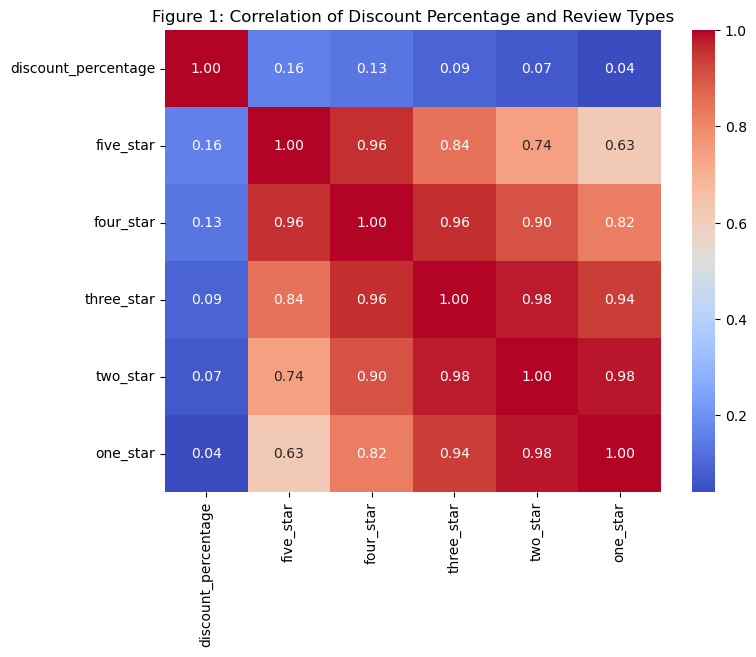

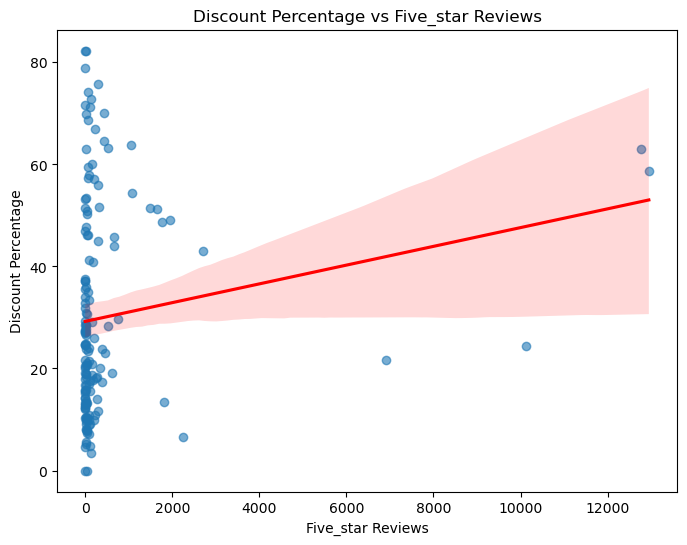

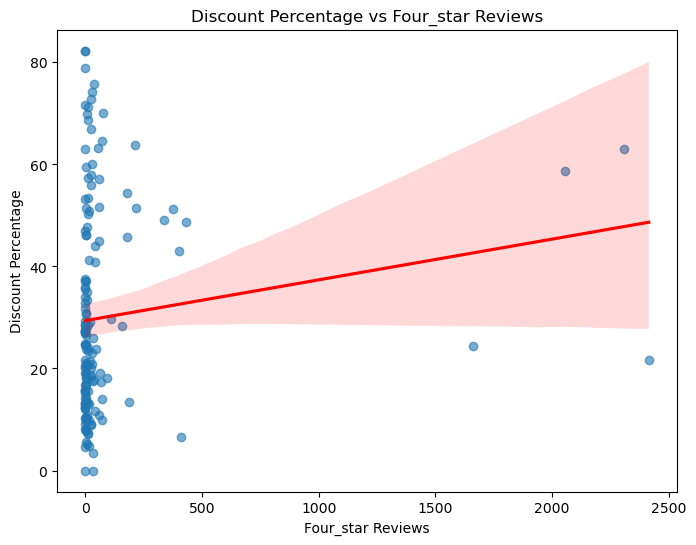

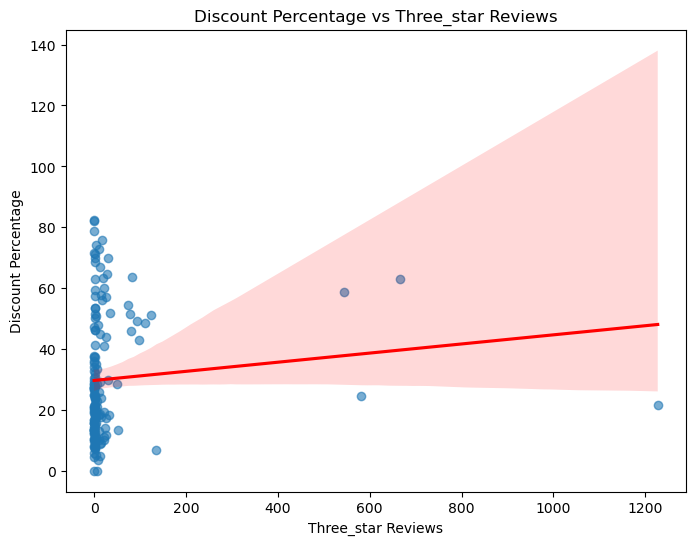

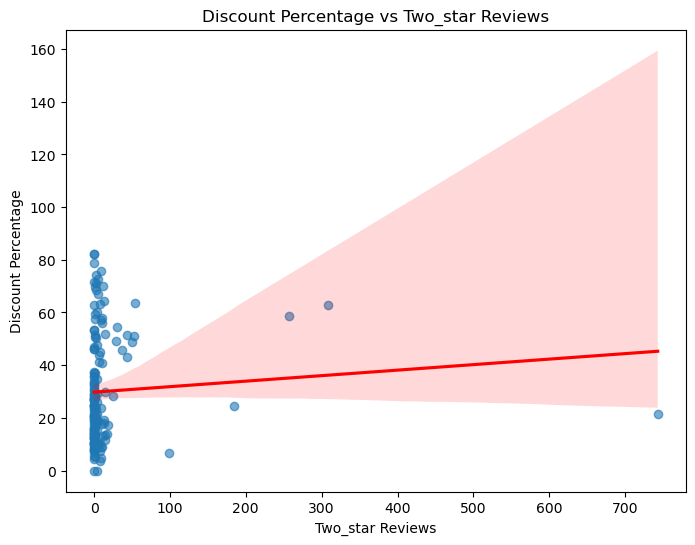

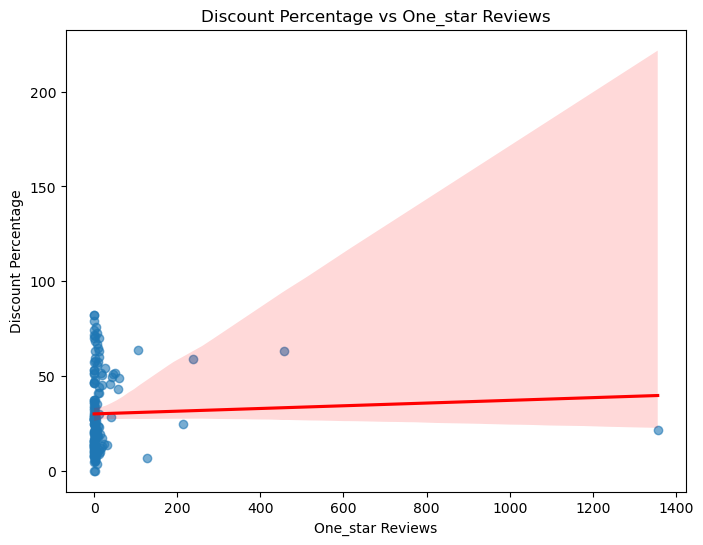

In [12]:
# Calculate correlations
correlations = data_set[['discount_percentage', 'five_star', 'four_star', 'three_star', 'two_star', 'one_star']].corr()

# Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Figure 1: Correlation of Discount Percentage and Review Types")
plt.show()

# Scatterplot for each review type against discount_percentage
review_columns = ['five_star', 'four_star', 'three_star', 'two_star', 'one_star']
for review in review_columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(
        x=data_set[review],
        y=data_set['discount_percentage'],
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    plt.title(f"Discount Percentage vs {review.capitalize()} Reviews")
    plt.xlabel(f"{review.capitalize()} Reviews")
    plt.ylabel("Discount Percentage")
    plt.show()
